In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=15,7
%matplotlib inline

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [30]:
df.shape

(303, 14)

# EDA

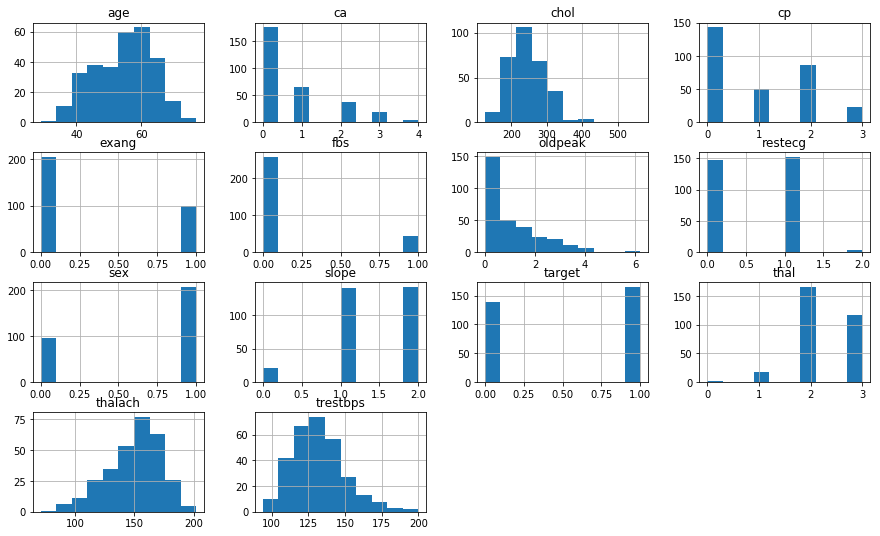

In [7]:
df.hist(figsize=(15,9))
plt.show()

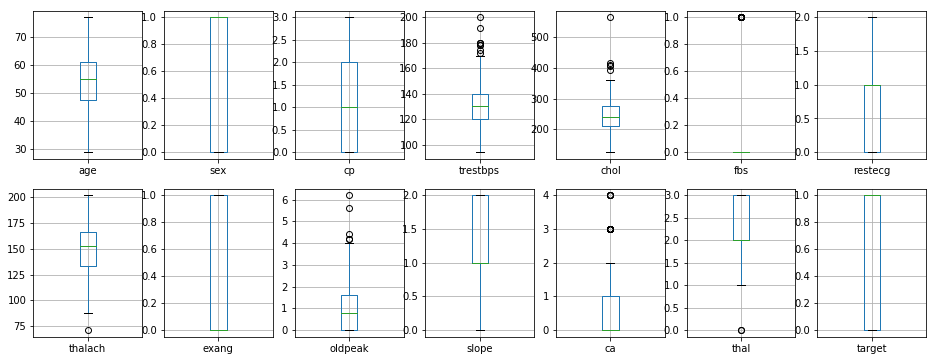

In [23]:
df.plot(kind='box',subplots=True,grid=True,layout=(2,7),figsize=(16,6))
plt.show()

In [27]:
correlation=df.corr()

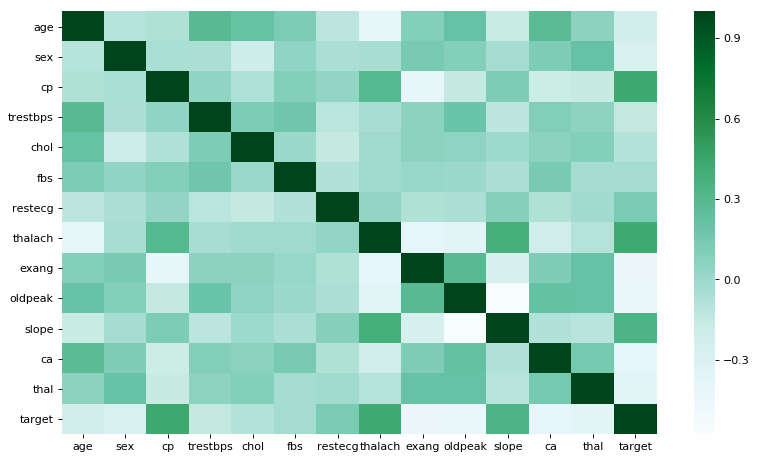

In [33]:
fig=plt.figure(figsize=(12,7),dpi=80)
sns.heatmap(correlation,cmap='BuGn')

# Preprosessing and Modeling


In [82]:
#Importing modelling libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [58]:
#Creating Classifiers
lr=LogisticRegression()
svc=LinearSVC()
rfc=RandomForestClassifier()

In [59]:
#Splitting data into target and variables
X=df.iloc[:,:13].values
y=df.iloc[:,13].values

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [61]:
#Training Logistic Regression on Training Data
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
#Training score for Logistics Regression
lr.score(X_train,y_train)

0.8584905660377359

In [69]:
#Prediction on Test Variables for LR
lr_pred=lr.predict(X_test)

In [83]:
#Accuracy for LR on test set
accuracy_score(y_test,lr_pred)

0.8131868131868132

In [72]:

confusion_matrix(y_test,lr_pred)

array([[33, 11],
       [ 6, 41]])

In [66]:
#Training Support Vector Classifier on Training Data
svc.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [67]:
#SVC score on train set
svc.score(X_train,y_train)

0.8537735849056604

In [74]:
#Predictions for SVC
svc_pred=svc.predict(X_test)

In [84]:
#accuracy for SVC on test
accuracy_score(y_test,svc_pred)

0.8131868131868132

In [75]:

confusion_matrix(y_test,svc_pred)

array([[33, 11],
       [ 6, 41]])

In [76]:
#Training on Random Forest
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [78]:
#Accuracy on training
rfc.score(X_train,y_train)

0.9858490566037735

In [80]:
rfc_pred=rfc.predict(X_test)

In [85]:
#Accuracy score on Test set.We can see it is lower than on the training set which could be and instancs of overfitiing.
accuracy_score(y_test,rfc_pred)

0.8021978021978022

In [81]:
confusion_matrix(y_test,rfc_pred)

array([[32, 12],
       [ 6, 41]])

In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lr_pred))

             precision    recall  f1-score   support

          0       0.85      0.75      0.80        44
          1       0.79      0.87      0.83        47

avg / total       0.82      0.81      0.81        91

